<a href="https://colab.research.google.com/github/ChangYujieCN/deep-learning-with-python/blob/main/4_4_Overfitting_and_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb

In [ ]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()

In [ ]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [ ]:
decoded_review = ' '.join([reverse_word_index.get(i - 3,'?') for i in train_data[0]])

In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [ ]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
original_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))
smaller_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
original_hist = original_model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 52ms/step - loss: 0.5510 - accuracy: 0.7407 - val_loss: 0.3393 - val_accuracy: 0.8764
Epoch 2/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2673 - accuracy: 0.9122 - val_loss: 0.2953 - val_accuracy: 0.8820
Epoch 3/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2019 - accuracy: 0.9309 - val_loss: 0.2867 - val_accuracy: 0.8852
Epoch 4/20
49/49 [==============================] - 2s 33ms/step - loss: 0.1605 - accuracy: 0.9461 - val_loss: 0.2972 - val_accuracy: 0.8821
Epoch 5/20
49/49 [==============================] - 4s 84ms/step - loss: 0.1367 - accuracy: 0.9538 - val_loss: 0.3194 - val_accuracy: 0.8770
Epoch 6/20
49/49 [==============================] - 2s 33ms/step - loss: 0.1229 - accuracy: 0.9589 - val_loss: 0.3305 - val_accuracy: 0.8764
Epoch 7/20
49/49 [==============================] - 2s 33ms/step - loss: 0.1086 - accuracy: 0.9648 - val_loss: 0.3528 - val_accuracy: 0.8740
Epoch 8/20
49

In [ ]:
smaller_model_hist = smaller_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 40ms/step - loss: 0.6101 - accuracy: 0.6825 - val_loss: 0.4463 - val_accuracy: 0.8684
Epoch 2/20
49/49 [==============================] - 1s 30ms/step - loss: 0.3848 - accuracy: 0.8925 - val_loss: 0.3436 - val_accuracy: 0.8854
Epoch 3/20
49/49 [==============================] - 1s 30ms/step - loss: 0.2790 - accuracy: 0.9202 - val_loss: 0.3011 - val_accuracy: 0.8874
Epoch 4/20
49/49 [==============================] - 2s 31ms/step - loss: 0.2265 - accuracy: 0.9309 - val_loss: 0.2845 - val_accuracy: 0.8897
Epoch 5/20
49/49 [==============================] - 1s 30ms/step - loss: 0.1874 - accuracy: 0.9412 - val_loss: 0.2805 - val_accuracy: 0.8890
Epoch 6/20
49/49 [==============================] - 1s 30ms/step - loss: 0.1666 - accuracy: 0.9474 - val_loss: 0.2847 - val_accuracy: 0.8866
Epoch 7/20
49/49 [==============================] - 1s 30ms/step - loss: 0.1486 - accuracy: 0.9508 - val_loss: 0.2954 - val_accuracy: 0.8832
Epoch 8/20
49

In [ ]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

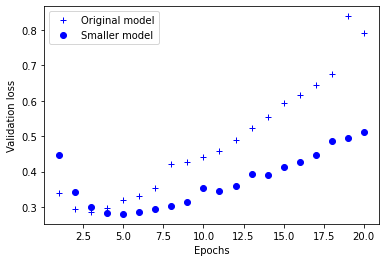

In [ ]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label="Original model")
plt.plot(epochs, smaller_model_val_loss, 'bo', label="Smaller model")
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [ ]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))
bigger_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
bigger_model_hist = bigger_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 13s 258ms/step - loss: 0.6021 - accuracy: 0.7161 - val_loss: 0.2865 - val_accuracy: 0.8862
Epoch 2/20
49/49 [==============================] - 10s 204ms/step - loss: 0.2272 - accuracy: 0.9088 - val_loss: 0.2972 - val_accuracy: 0.8764
Epoch 3/20
49/49 [==============================] - 10s 204ms/step - loss: 0.1266 - accuracy: 0.9526 - val_loss: 0.2891 - val_accuracy: 0.8849
Epoch 4/20
49/49 [==============================] - 10s 205ms/step - loss: 0.0648 - accuracy: 0.9828 - val_loss: 0.4335 - val_accuracy: 0.8764
Epoch 5/20
49/49 [==============================] - 10s 204ms/step - loss: 0.0432 - accuracy: 0.9887 - val_loss: 0.5200 - val_accuracy: 0.8827
Epoch 6/20
49/49 [==============================] - 10s 202ms/step - loss: 0.0313 - accuracy: 0.9960 - val_loss: 0.5038 - val_accuracy: 0.8796
Epoch 7/20
49/49 [==============================] - 10s 203ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7198 - val_accuracy: 0.8803

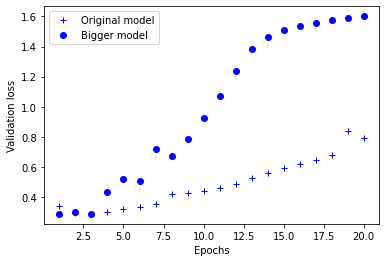

In [ ]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [ ]:
from keras import regularizers
l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,epochs=20, batch_size=512, validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 3s 49ms/step - loss: 0.5989 - accuracy: 0.7289 - val_loss: 0.3872 - val_accuracy: 0.8804
Epoch 2/20
49/49 [==============================] - 2s 33ms/step - loss: 0.3309 - accuracy: 0.9018 - val_loss: 0.3333 - val_accuracy: 0.8901
Epoch 3/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2623 - accuracy: 0.9255 - val_loss: 0.3295 - val_accuracy: 0.8888
Epoch 4/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2385 - accuracy: 0.9337 - val_loss: 0.3444 - val_accuracy: 0.8826
Epoch 5/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2290 - accuracy: 0.9372 - val_loss: 0.3751 - val_accuracy: 0.8740
Epoch 6/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2187 - accuracy: 0.9419 - val_loss: 0.3944 - val_accuracy: 0.8653
Epoch 7/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2106 - accuracy: 0.9438 - val_loss: 0.4111 - val_accuracy: 0.8614
Epoch 8/20
49

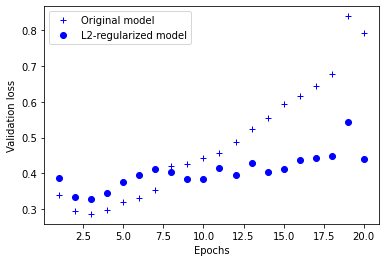

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']
plt.plot(epochs, original_val_loss,'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss,'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

In [ ]:
from keras import regularizers
# L1 regularization
regularizers.l1(0.001)
# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

In [ ]:
# At traning time: we drop out 50% of the units in the output
# layer_output *= np.random.randint(0, high=2, size=layer_output.shape) # 

In [ ]:
# 测试的时候
# layer_output *= 0.5

In [ ]:
# 两个运算都在训练时进行 而测试时输出保持不变
# layer_output = np.randint(0, hight=2, size=layer_output.shape)
# layer_output /= 0.5 

In [ ]:
# model.add(layers.Dropout(0.5))

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
dpt_model_hist = dpt_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 85ms/step - loss: 0.6445 - accuracy: 0.6084 - val_loss: 0.4479 - val_accuracy: 0.8667
Epoch 2/20
49/49 [==============================] - 2s 32ms/step - loss: 0.4597 - accuracy: 0.8078 - val_loss: 0.3357 - val_accuracy: 0.8847
Epoch 3/20
49/49 [==============================] - 2s 32ms/step - loss: 0.3613 - accuracy: 0.8632 - val_loss: 0.2942 - val_accuracy: 0.8869
Epoch 4/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2994 - accuracy: 0.8979 - val_loss: 0.2870 - val_accuracy: 0.8852
Epoch 5/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2614 - accuracy: 0.9124 - val_loss: 0.2795 - val_accuracy: 0.8889
Epoch 6/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2303 - accuracy: 0.9238 - val_loss: 0.2856 - val_accuracy: 0.8895
Epoch 7/20
49/49 [==============================] - 2s 32ms/step - loss: 0.1998 - accuracy: 0.9334 - val_loss: 0.3022 - val_accuracy: 0.8873
Epoch 8/20
49

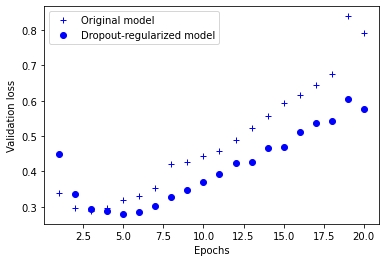

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']
plt.plot(epochs,original_val_loss, 'b+', label='Original model')
plt.plot(epochs,dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()